In [6]:
import pandas as pd
import numpy as np
from pandas.tools import plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
kredit=pd.read_csv('training_german.csv', sep=',')
kredittesting = pd.read_csv('testing_german.csv', sep=',')

# QUICK LOOK

In [8]:
kredit.shape

(16625, 10)

In [9]:
kredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 10 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


In [10]:
kredit.head(5)

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [11]:
kredit.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,50720.634827,48815.920662,46471.030556,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,73365.449060,70753.129768,68182.984755,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,3491.000000,2997.000000,2550.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,21943.000000,20987.000000,19954.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,65903.000000,62725.000000,59111.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,746814.000000,646770.000000,693131.000000,1.000000


# EXPLORATORY DATA ANALYSIS

**Histogram**

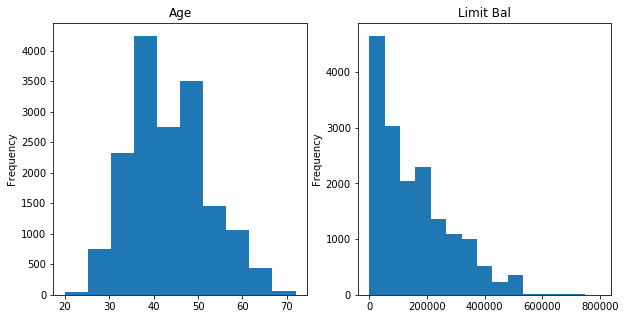

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
kredit['AGE'].plot.hist(bins=10, title='Age')
plt.subplot(122)
kredit['LIMIT_BAL'].plot.hist(bins=15, title='Limit Bal')
plt.show()

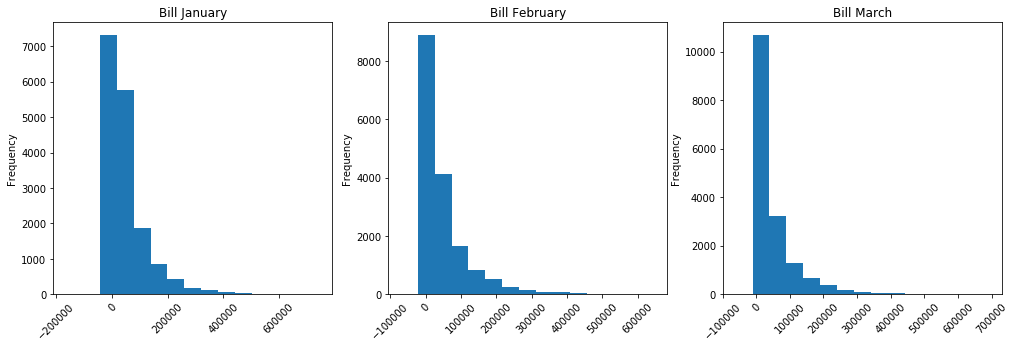

In [13]:
plt.figure(figsize=(17,5))
plt.subplot(131)
kredit['BILL_AMT1'].plot.hist(bins=15, title='Bill January', rot=45)
plt.subplot(132)
kredit['BILL_AMT2'].plot.hist(bins=15, title='Bill February', rot=45)
plt.subplot(133)
kredit['BILL_AMT3'].plot.hist(bins=15, title='Bill March', rot=45)
plt.show()

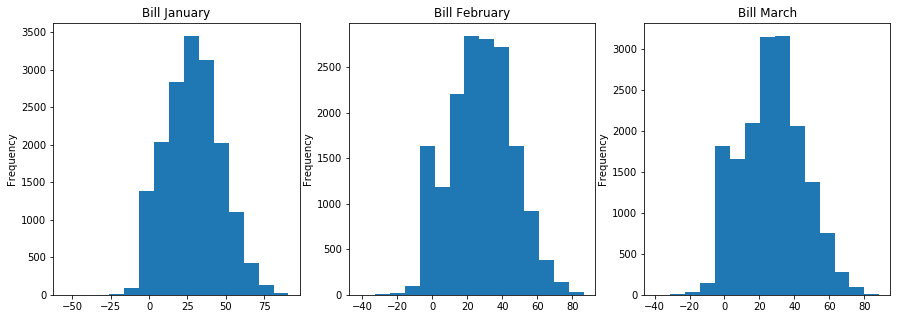

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(131)
kredit['BILL_AMT1'].apply(np.cbrt).plot.hist(bins=15, title='Bill January')
plt.subplot(132)
kredit['BILL_AMT2'].apply(np.cbrt).plot.hist(bins=15, title='Bill February')
plt.subplot(133)
kredit['BILL_AMT3'].apply(np.cbrt).plot.hist(bins=15, title='Bill March')
plt.show()

**Barplot**

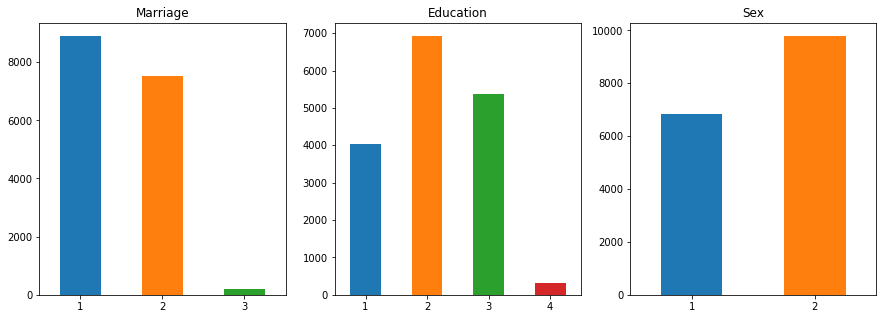

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(131)
kredit['MARRIAGE'].value_counts().sort_index().plot.bar(rot=0, title='Marriage')
plt.subplot(132)
kredit['EDUCATION'].value_counts().sort_index().plot.bar(rot=0, title='Education')
plt.subplot(133)
kredit['SEX'].value_counts().sort_index().plot.bar(rot=0, title='Sex')
plt.show()

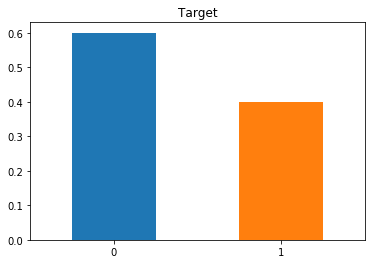

In [16]:
target= kredit['TARGET'].value_counts(normalize=True).plot.bar(rot=0, title='Target')
plt.show()

**Boxplot & Outlier**

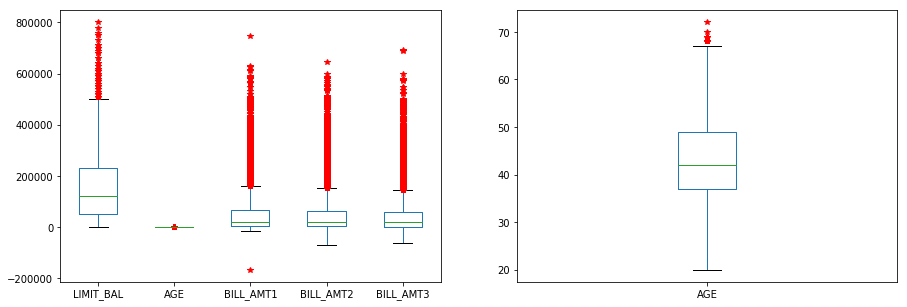

In [17]:
col_list=['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3']
numkredit = kredit[kredit.columns[kredit.columns.isin(col_list)]]

plt.figure(figsize=(15,5))
plt.subplot(121)
numkredit.boxplot(sym='r*',grid=False)
plt.subplot(122)
numkredit.boxplot(column='AGE', sym='r*', grid=False)
plt.show()

**Numeric Variable vs Target**

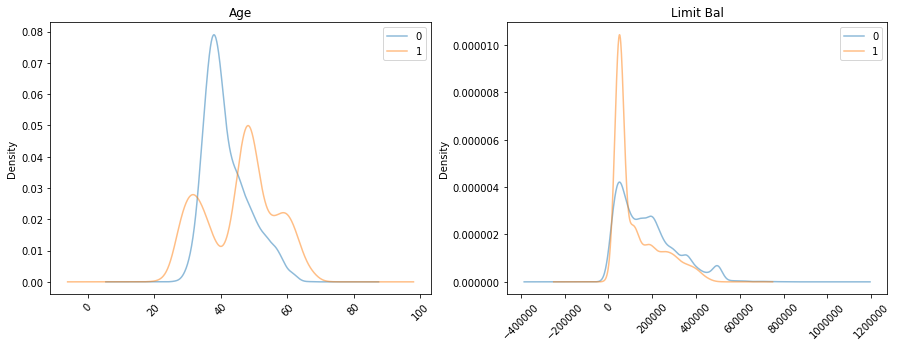

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
kredit.groupby('TARGET').AGE.plot.density(alpha=0.5, legend=True, title='Age', rot=45)
plt.subplot(122)
kredit.groupby('TARGET').LIMIT_BAL.plot.density(alpha=0.5, legend=True, title='Limit Bal', rot=45)
plt.show()

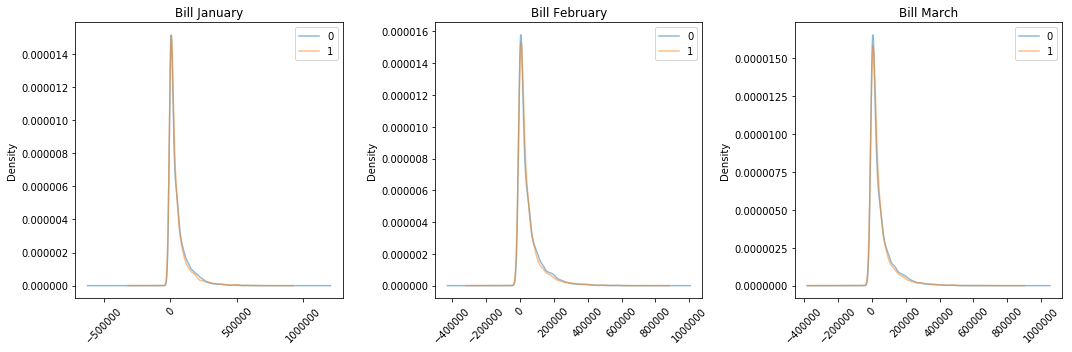

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(131)
kredit.groupby('TARGET').BILL_AMT1.plot.density(alpha=0.5, legend=True, title='Bill January', rot=45)
plt.subplot(132)
kredit.groupby('TARGET').BILL_AMT2.plot.density(alpha=0.5, legend=True, title='Bill February', rot=45)
plt.subplot(133)
kredit.groupby('TARGET').BILL_AMT3.plot.density(alpha=0.5, legend=True, title='Bill March', rot=45)
plt.tight_layout()
plt.show()

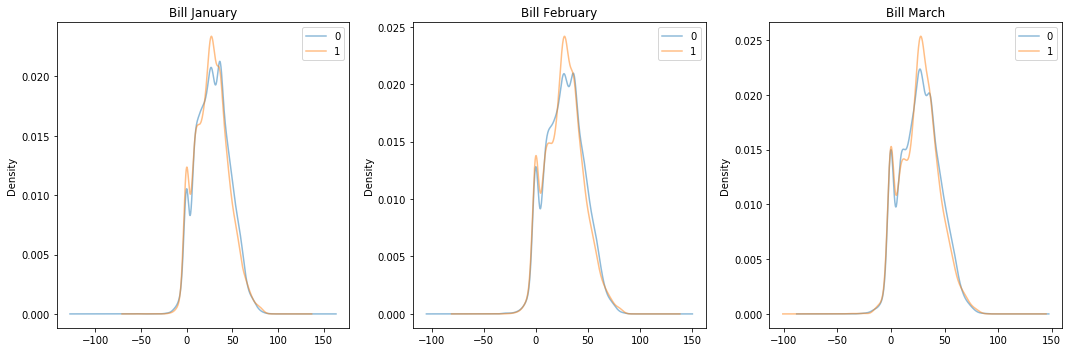

In [20]:
kreditbar = kredit.copy(deep=True)

plt.figure(figsize=(15,5))
plt.subplot(131)
kreditbar['BILL_AMT1']=np.cbrt(kreditbar['BILL_AMT1'])
kreditbar.groupby('TARGET').BILL_AMT1.plot.density(alpha=0.5, legend=True, title='Bill January')
plt.subplot(132)
kreditbar['BILL_AMT2']=np.cbrt(kreditbar['BILL_AMT2'])
kreditbar.groupby('TARGET').BILL_AMT2.plot.density(alpha=0.5, legend=True, title='Bill February')
plt.subplot(133)
kreditbar['BILL_AMT3']=np.cbrt(kreditbar['BILL_AMT3'])
kreditbar.groupby('TARGET').BILL_AMT3.plot.density(alpha=0.5, legend=True, title='Bill March')
plt.tight_layout()
plt.show()

**Categoric Variable vs Target**

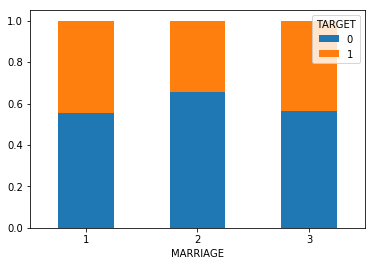

In [21]:
pd.crosstab(kredit['MARRIAGE'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True)

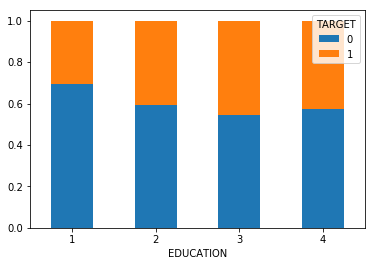

In [22]:
pd.crosstab(kredit['EDUCATION'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True)

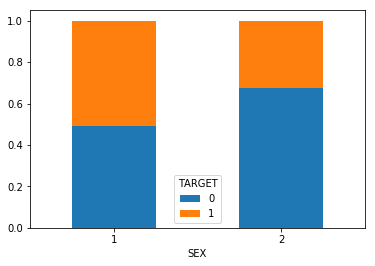

In [23]:
pd.crosstab(kredit['SEX'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True)

**Correlation PLot**

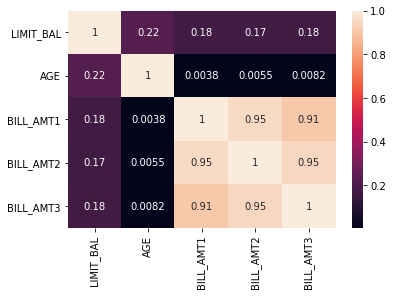

In [24]:
import seaborn as sns
sns.heatmap(numkredit.corr(), annot=True)

# ONE HOT ENCODER (DUMMIES VARIABLE)

In [25]:
kredit=pd.get_dummies(kredit, columns=['MARRIAGE', 'EDUCATION', 'SEX',], drop_first=bool)

In [26]:
kredit.head(10)

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2
0,1,30000.0,40,24607.0,24430.0,23881.0,0,0,0,0,0,0,1
1,2,20000.0,41,17040.0,16474.0,17203.0,0,0,0,0,0,0,1
2,3,20000.0,36,17332.0,18600.0,17947.0,0,0,0,0,0,0,1
3,4,20000.0,35,2003.0,2948.0,3372.0,0,0,0,0,0,0,1
4,5,170000.0,38,171465.0,145196.0,110163.0,0,0,0,0,0,0,1
5,6,20000.0,40,16500.0,17012.0,18181.0,0,0,0,0,0,0,1
6,7,200000.0,32,157222.0,160320.0,162140.0,0,0,0,0,0,0,1
7,8,370000.0,37,47269.0,43531.0,59801.0,0,0,0,0,0,0,1
8,9,160000.0,39,106643.0,89397.0,90348.0,0,0,0,0,0,0,1
9,10,30000.0,36,25826.0,27274.0,25744.0,0,0,0,0,0,0,1


# LOGISTIC REGRESSION

**TRAIN TEST SPLIT**

In [27]:
X=kredit.drop(['ID','TARGET'],1)
Y=kredit['TARGET']
train_X,test_X,train_y,test_y =train_test_split(X,Y,test_size=0.2,
                                                random_state=123)

In [28]:
train_X.head(4)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_2
9927,80000.0,57,78009.0,78616.0,49662.0,1,0,0,0,0,1
5964,380000.0,40,106065.0,97979.0,100599.0,0,0,0,1,0,0
3874,50000.0,39,47479.0,49344.0,19596.0,1,0,0,0,0,0
9173,290000.0,47,83607.0,83618.0,86768.0,1,0,0,1,0,0


**Logistic Regression Modeling**

In [39]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X, train_y)
# logregpred = logreg.predict(test_X)
logregpred = logreg.predict(train_X)

**Summary**

In [40]:
print('Intercept : \n', logreg.intercept_)
coef = pd.concat([pd.DataFrame(X.columns),
                  pd.DataFrame(np.transpose(logreg.coef_))], 
                 axis = 1)
coef

Intercept : 
 [3.17102244e-05]


,0,0
0,LIMIT_BAL,-4.668152e-06
1,AGE,9.333653e-03
2,BILL_AMT1,-2.488037e-06
3,BILL_AMT2,8.406160e-07
4,BILL_AMT3,1.434783e-06
5,MARRIAGE_2,-1.579935e-04
6,MARRIAGE_3,3.252801e-09
7,EDUCATION_2,2.190826e-05
8,EDUCATION_3,1.581840e-04
9,EDUCATION_4,5.500223e-06


**Confusion Matrix**

In [41]:
cm = confusion_matrix(train_y,logregpred)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Confusion Matrix : 
 [[5588 2349]
 [2624 2739]]
Accuracy :  0.6260902255639098
Sensitivity :  0.5107216110385978
Specificity :  0.7040443492503464


# DECISION TREE

**Decision Tree Modeling**

In [42]:
decisiontree = DecisionTreeClassifier(random_state = 123)
decisiontree.fit(train_X, train_y)
# dtpred = decisiontree.predict(test_X)
dtpred = decisiontree.predict(train_X)

**Confusion Matrix**

In [43]:
cm1 = confusion_matrix(train_y,dtpred)

total1=sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy : ', accuracy1)
print('Sensitivity : ', sensitivity1 )
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[7936    1]
 [   8 5355]]
Accuracy :  0.9993233082706767
Sensitivity :  0.9985082975946299
Specificity :  0.9998740078115157


In [44]:
features = train_X.columns
export_graphviz(decisiontree, 
                out_file = 'D:/dt.dot', 
                feature_names = features,
                class_names = ["0","1"]) 
## copy this note to www.webgraphviz.com

## Feature Engineering Excercise

In [45]:
kredit=pd.read_csv('training_german.csv', sep=',')
kredittesting = pd.read_csv('testing_german.csv', sep=',')

In [46]:
kredit=pd.get_dummies(kredit, columns=['MARRIAGE', 'EDUCATION', 'SEX',], drop_first=True)